In [55]:
import requests
import json
import gmaps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

In [239]:
#import csv file from resources folder
yearly_data_2019 = pd.read_csv("Resources/yearly_data_clean_2019.csv")
yearly_data_2020 = pd.read_csv("Resources/yearly_data_clean_2020.csv")
yearly_data_2021 = pd.read_csv("Resources/yearly_data_clean_2021.csv")
yearly_data_2019.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,990000.0,57.0,2425000.0,370000.0,661000.0,808000.0,1445000.0,...,1150000.0,71.0,2573000.0,115000.0,50.0,26.0,645.0,150.0,1250.0,400.0
1,3040,Aberfeldie,647,1368000.0,244.0,8000000.0,297000.0,480000.0,876000.0,1820000.0,...,1300000.0,285.0,8000000.0,280000.0,182.0,94.0,525.0,373.0,1400.0,250.0
2,3042,Airport West,757,953000.0,74.0,1500000.0,480000.0,610000.0,800000.0,1100000.0,...,953000.0,98.0,1470000.0,500000.0,62.0,24.0,475.0,125.0,1350.0,260.0
3,3021,Albanvale,787,596000.0,348.0,1400000.0,300000.0,410000.0,510000.0,650000.0,...,599000.0,532.0,2500000.0,60000.0,132.0,41.0,360.0,521.0,1647.0,190.0
4,3206,Albert Park,797,2575000.0,55.0,8600000.0,735000.0,1353000.0,1990000.0,3650000.0,...,2425000.0,52.0,13000000.0,315000.0,37.0,17.0,840.0,95.0,2000.0,350.0


In [130]:
Rank_median_sold_price = yearly_data_2019.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2019 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2019.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2019 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2019.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2019 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2019.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2019 = Rank_highest_listing_price.head(10)
Rank_median_sold_price = yearly_data_2019.sort_values(by = "medianSoldPrice" , ascending = True)
bottom_10_median_price_2019 = Rank_median_sold_price.head(10)
Rank_median_rent_price = yearly_data_2019.sort_values(by = "medianRentListingPrice" , ascending = False)
top_10_median_rent_price_2019 = Rank_median_rent_price.head(10)
Rank_highest_rent_price = yearly_data_2019.sort_values(by = "highestRentListingPrice" , ascending = False)
top_10_highest_rent_price_2019 = Rank_highest_rent_price.head(10)
Rank_median_rent_price = yearly_data_2019.sort_values(by = "medianRentListingPrice" , ascending = True)
bottom_10_median_rent_price_2019 = Rank_median_rent_price.head(10)
bottom_10_median_rent_price_2019

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
172,3338,Melton South,25997,410000.0,204.0,855000.0,211000.0,300000.0,370000.0,440000.0,...,448000.0,666.0,4200000.0,32000.0,29.0,6.0,320.0,327.0,500.0,201.0
38,3338,Brookfield,6207,410000.0,204.0,855000.0,211000.0,300000.0,370000.0,440000.0,...,448000.0,666.0,4200000.0,32000.0,29.0,6.0,320.0,327.0,500.0,201.0
112,3200,Frankston North,15007,483000.0,107.0,570000.0,265000.0,410000.0,440000.0,515000.0,...,460000.0,179.0,640000.0,250000.0,20.0,9.0,320.0,172.0,410.0,230.0
220,3335,Rockbank,34697,500000.0,15.0,7891000.0,380000.0,380000.0,465000.0,563000.0,...,498000.0,749.0,2000000.0,10000.0,4.0,1.0,335.0,18.0,520.0,290.0
173,3337,Melton West,26007,448000.0,150.0,2200000.0,85000.0,350000.0,400000.0,505000.0,...,449000.0,249.0,750000.0,120000.0,13.0,4.0,340.0,166.0,600.0,265.0
156,3337,Kurunjang,22327,448000.0,150.0,2200000.0,85000.0,350000.0,400000.0,505000.0,...,449000.0,249.0,750000.0,120000.0,13.0,4.0,340.0,166.0,600.0,265.0
10,3022,Ardeer,1507,604000.0,50.0,1453000.0,440000.0,455000.0,560000.0,668000.0,...,585000.0,74.0,1100000.0,270000.0,43.0,19.0,340.0,95.0,700.0,230.0
141,3047,Jacana,19797,535000.0,37.0,910000.0,320000.0,395000.0,485000.0,595000.0,...,520000.0,51.0,690000.0,308000.0,25.0,15.0,350.0,51.0,450.0,300.0
283,3024,Wyndham Vale,45307,475000.0,338.0,830000.0,307000.0,372000.0,432000.0,530000.0,...,495000.0,1010.0,1000000.0,100000.0,57.0,29.0,350.0,455.0,520.0,280.0
85,3047,Dallas,11087,535000.0,37.0,910000.0,320000.0,395000.0,485000.0,595000.0,...,520000.0,51.0,690000.0,308000.0,25.0,15.0,350.0,51.0,450.0,300.0


In [131]:
Rank_median_sold_price = yearly_data_2020.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2020 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2020.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2020 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2020.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2020 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2020.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2020 = Rank_highest_listing_price.head(10)
Rank_median_sold_price = yearly_data_2020.sort_values(by = "medianSoldPrice" , ascending = True)
bottom_10_median_price_2020 = Rank_median_sold_price.head(10)
Rank_median_rent_price = yearly_data_2020.sort_values(by = "medianRentListingPrice" , ascending = False)
top_10_median_rent_price_2020 = Rank_median_rent_price.head(10)
Rank_highest_rent_price = yearly_data_2020.sort_values(by = "highestRentListingPrice" , ascending = False)
top_10_highest_rent_price_2020 = Rank_highest_rent_price.head(10)
Rank_median_rent_price = yearly_data_2020.sort_values(by = "medianRentListingPrice" , ascending = True)
bottom_10_median_rent_price_2020 = Rank_median_rent_price.head(10)
bottom_10_median_rent_price_2020

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
178,3338,Melton South,25997,399000.0,163.0,3780000.0,210000.0,330000.0,370000.0,449000.0,...,438000.0,651.0,1150000.0,36000.0,8.0,3.0,320.0,380.0,550.0,201.0
43,3338,Brookfield,6207,399000.0,163.0,3780000.0,210000.0,330000.0,370000.0,449000.0,...,438000.0,651.0,1150000.0,36000.0,8.0,3.0,320.0,380.0,550.0,201.0
118,3200,Frankston North,15007,444000.0,77.0,600000.0,265000.0,408000.0,424000.0,470000.0,...,420000.0,132.0,550000.0,250000.0,15.0,3.0,330.0,189.0,430.0,260.0
296,3024,Wyndham Vale,45307,465000.0,330.0,893000.0,252000.0,362000.0,430000.0,530000.0,...,486000.0,1151.0,895000.0,100000.0,26.0,11.0,350.0,643.0,720.0,270.0
87,3047,Dallas,11087,528000.0,28.0,753000.0,363000.0,416000.0,500000.0,600000.0,...,540000.0,37.0,1400000.0,380000.0,20.0,16.0,350.0,59.0,410.0,280.0
42,3047,Broadmeadows,6127,528000.0,28.0,753000.0,363000.0,416000.0,500000.0,600000.0,...,540000.0,37.0,1400000.0,380000.0,20.0,16.0,350.0,59.0,410.0,280.0
146,3047,Jacana,19797,528000.0,28.0,753000.0,363000.0,416000.0,500000.0,600000.0,...,540000.0,37.0,1400000.0,380000.0,20.0,16.0,350.0,59.0,410.0,280.0
10,3022,Ardeer,1507,585000.0,42.0,1350000.0,412000.0,490000.0,550000.0,640000.0,...,550000.0,55.0,1200000.0,195000.0,24.0,9.0,350.0,77.0,550.0,280.0
3,3021,Albanvale,787,590000.0,327.0,1300000.0,365000.0,450000.0,535000.0,643000.0,...,590000.0,527.0,1460000.0,34000.0,135.0,51.0,360.0,590.0,1517.0,240.0
130,3976,Hampton Park,17807,535000.0,212.0,900000.0,321000.0,463000.0,500000.0,572000.0,...,500000.0,439.0,1800000.0,60000.0,23.0,8.0,360.0,491.0,595.0,280.0


In [132]:
Rank_median_sold_price = yearly_data_2021.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2021 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2021.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2021 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2021.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2021 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2021.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2021 = Rank_highest_listing_price.head(10)
Rank_median_sold_price = yearly_data_2021.sort_values(by = "medianSoldPrice" , ascending = True)
bottom_10_median_price_2021 = Rank_median_sold_price.head(10)
Rank_median_rent_price = yearly_data_2021.sort_values(by = "medianRentListingPrice" , ascending = False)
top_10_median_rent_price_2021 = Rank_median_rent_price.head(10)
Rank_highest_rent_price = yearly_data_2021.sort_values(by = "highestRentListingPrice" , ascending = False)
top_10_highest_rent_price_2021 = Rank_highest_rent_price.head(10)
Rank_median_rent_price = yearly_data_2021.sort_values(by = "medianRentListingPrice" , ascending = True)
bottom_10_median_rent_price_2021 = Rank_median_rent_price.head(10)
bottom_10_median_rent_price_2021

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
163,3337,Kurunjang,22327,480000.0,156.0,975000.0,292000.0,365000.0,415000.0,550000.0,...,470000.0,242.0,3000000.0,37000.0,9.0,6.0,340.0,128.0,485.0,161.0
120,3200,Frankston North,15007,490000.0,91.0,640000.0,355000.0,400000.0,455000.0,545000.0,...,440000.0,127.0,640000.0,340000.0,16.0,11.0,340.0,128.0,1575.0,250.0
177,3337,Melton West,26007,480000.0,156.0,975000.0,292000.0,365000.0,415000.0,550000.0,...,470000.0,242.0,3000000.0,37000.0,9.0,6.0,340.0,128.0,485.0,161.0
147,3047,Jacana,19797,563000.0,32.0,725000.0,400000.0,415000.0,520000.0,600000.0,...,550000.0,45.0,1400000.0,360000.0,11.0,6.0,350.0,83.0,475.0,260.0
221,3030,Point Cook,32927,748000.0,30.0,2314000.0,125000.0,545000.0,600000.0,820000.0,...,705000.0,58.0,1785000.0,137000.0,1.0,1.0,350.0,54.0,650.0,121.0
241,3021,St Albans,37177,613000.0,336.0,1550000.0,330000.0,450000.0,555000.0,685000.0,...,599000.0,506.0,1460000.0,55000.0,91.0,43.0,350.0,655.0,1593.0,170.0
292,3030,Werribee,43317,748000.0,30.0,2314000.0,125000.0,545000.0,600000.0,820000.0,...,705000.0,58.0,1785000.0,137000.0,1.0,1.0,350.0,54.0,650.0,121.0
293,3030,Werribee South,43337,748000.0,30.0,2314000.0,125000.0,545000.0,600000.0,820000.0,...,705000.0,58.0,1785000.0,137000.0,1.0,1.0,350.0,54.0,650.0,121.0
45,3047,Broadmeadows,6127,563000.0,32.0,725000.0,400000.0,415000.0,520000.0,600000.0,...,550000.0,45.0,1400000.0,360000.0,11.0,6.0,350.0,83.0,475.0,260.0
9,3022,Ardeer,1507,630000.0,43.0,1375000.0,420000.0,480000.0,575000.0,682000.0,...,583000.0,51.0,900000.0,400000.0,22.0,17.0,350.0,78.0,600.0,275.0


### The top 10 sell price suburb in 2019, 2020, 2021 (Median Sold Price&Highest Sold Price)

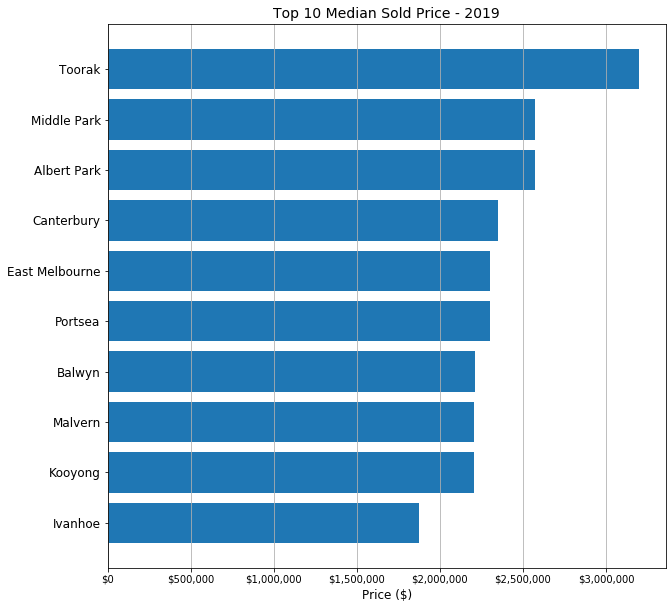

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2019["medianSoldPrice"]
y_axis = top_10_median_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.savefig("Savefig/Top 10 Median Sold Price - 2019.png")
plt.show()

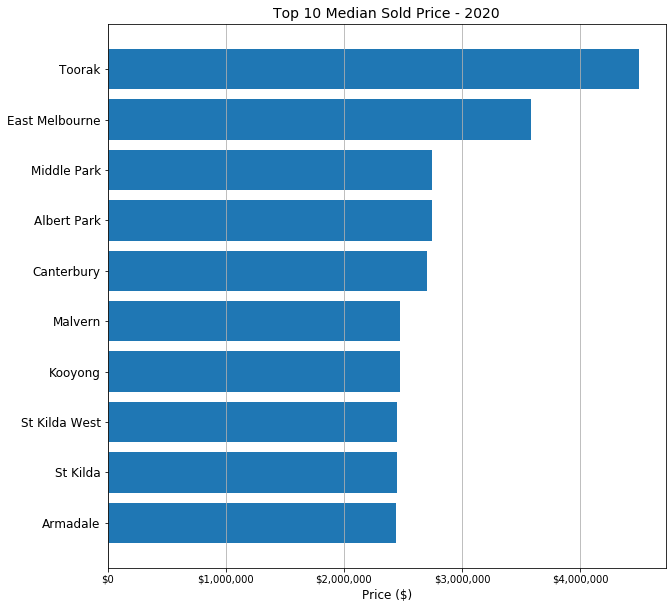

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2020["medianSoldPrice"]
y_axis = top_10_median_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Sold Price - 2020.png")
plt.show()

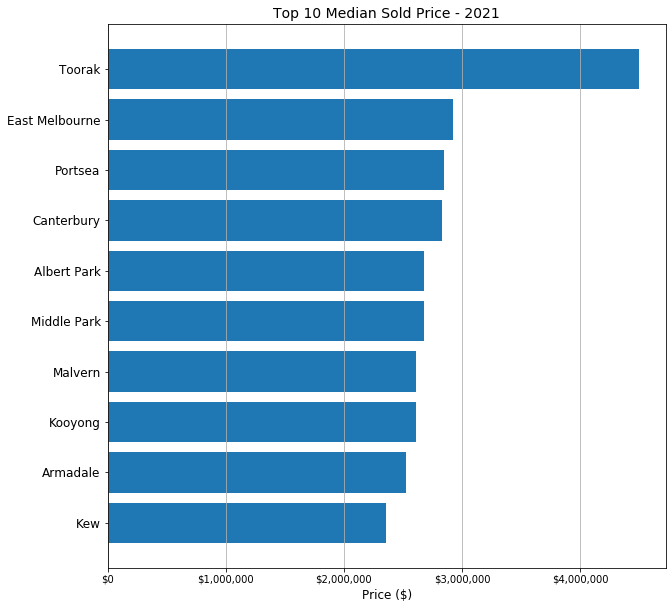

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2021["medianSoldPrice"]
y_axis = top_10_median_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.savefig("Savefig/Top 10 Median Sold Price - 2021.png")
plt.show()

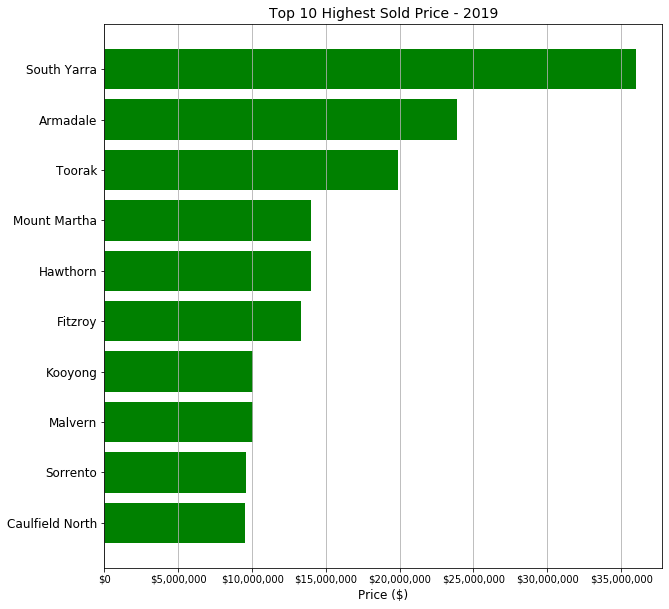

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2019["highestSoldPrice"]
y_axis = top_10_highest_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.savefig("Savefig/Top 10 Highest Sold Price - 2019.png")
plt.show()

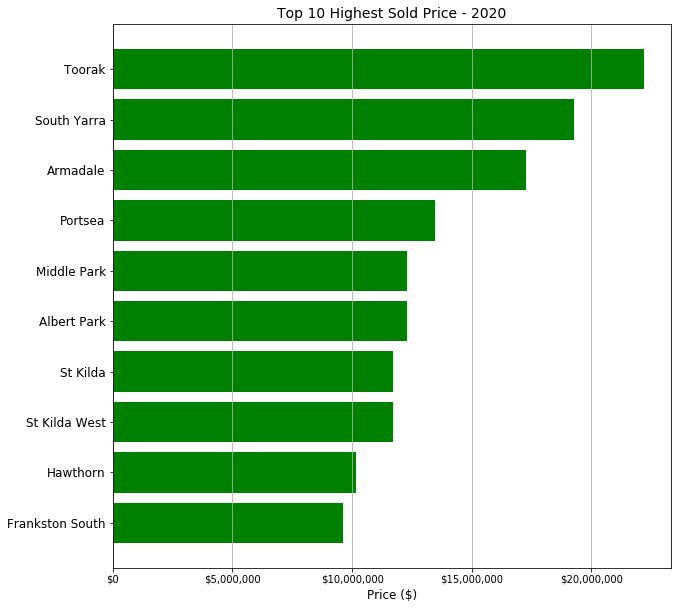

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2020["highestSoldPrice"]
y_axis = top_10_highest_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Sold Price - 2020.png")
plt.show()

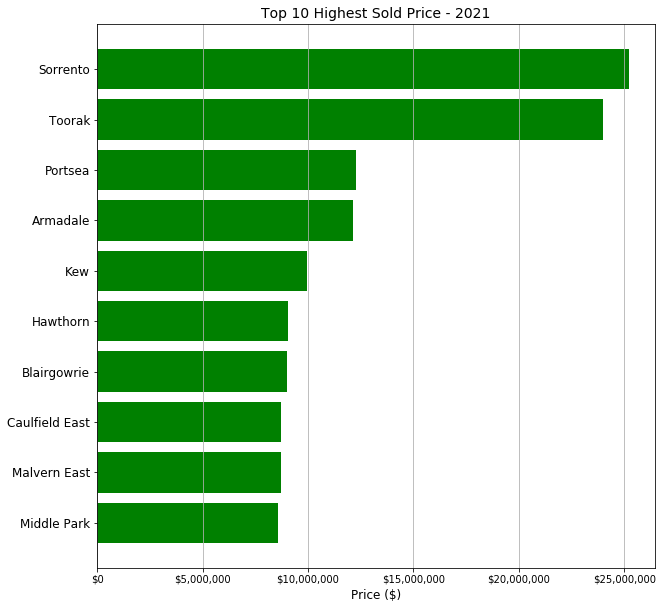

In [212]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2021["highestSoldPrice"]
y_axis = top_10_highest_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Sold Price - 2021.png")
plt.show()

### The top 10 list price suburb in 2019, 2020, 2021 (Median Sale Listing Price&Highest Sale Listing Price)

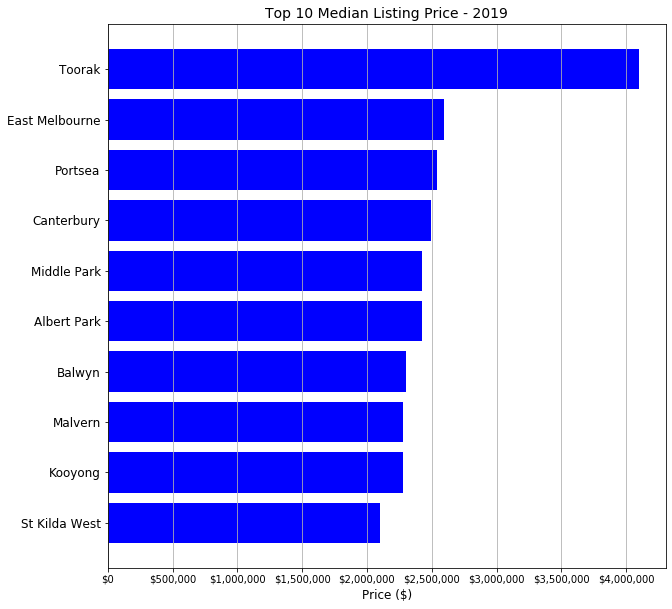

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2019["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Listing Price - 2019.png")
plt.show()

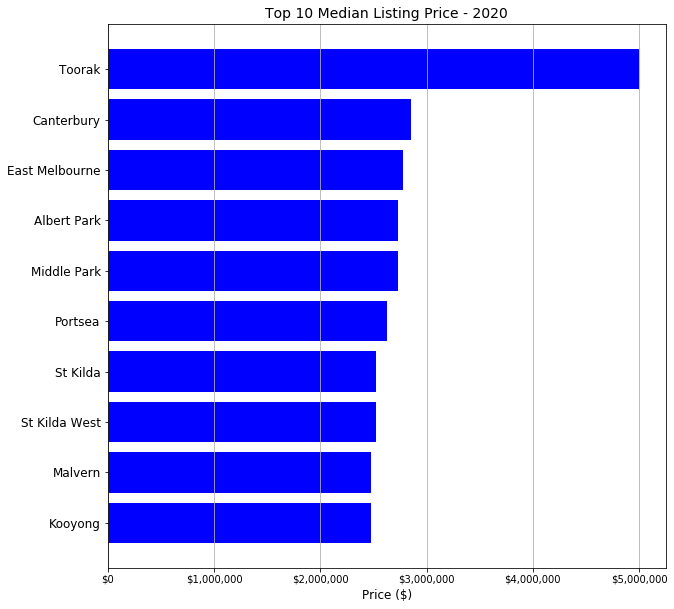

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2020["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Listing Price - 2020.png")
plt.show()

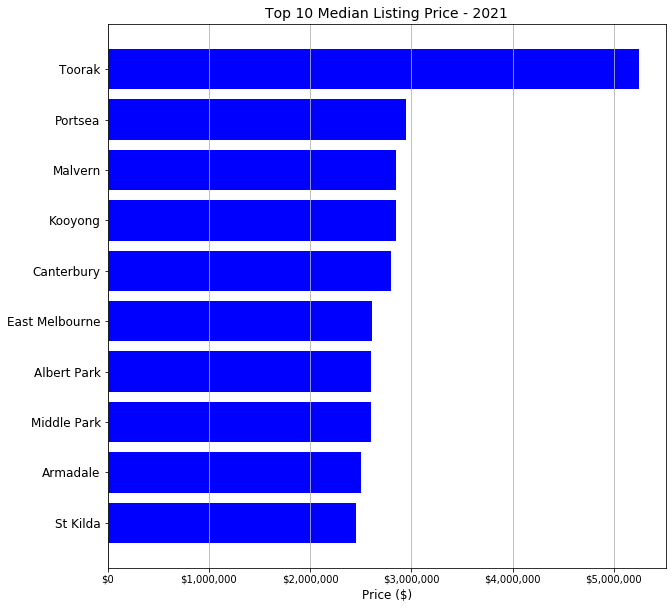

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2021["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Listing Price - 2021.png")
plt.show()

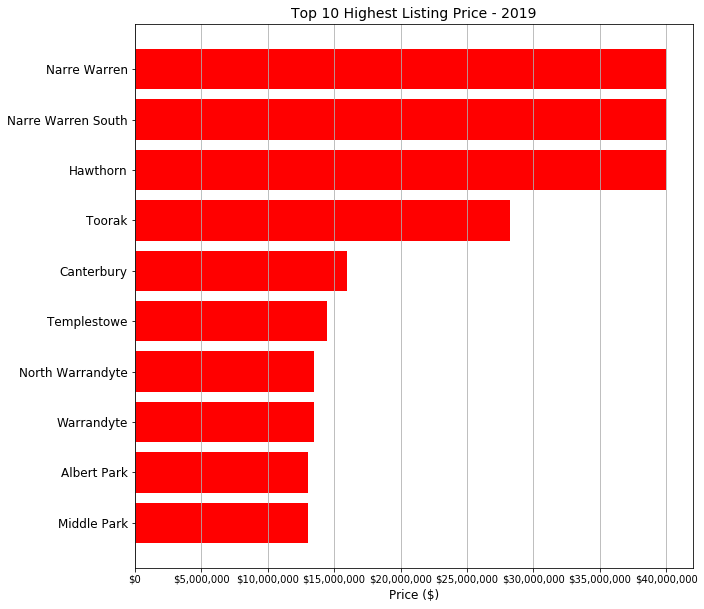

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2019["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Listing Price - 2019.png")
plt.show()

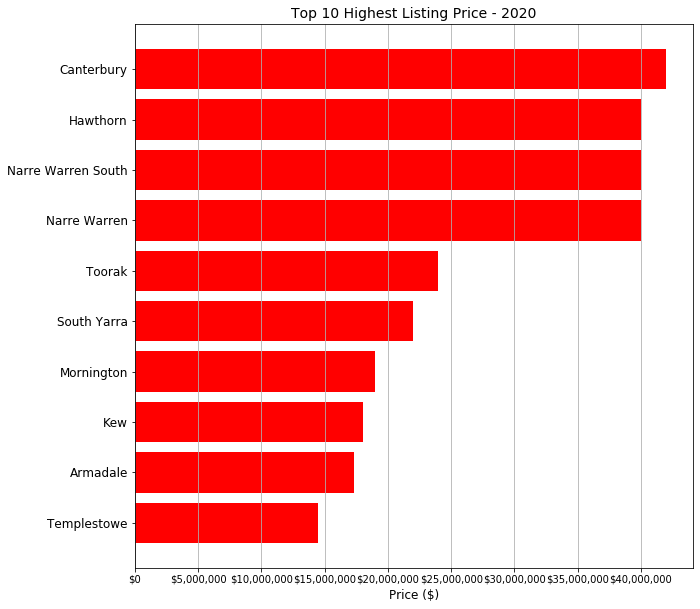

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2020["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Listing Price - 2020.png")
plt.show()

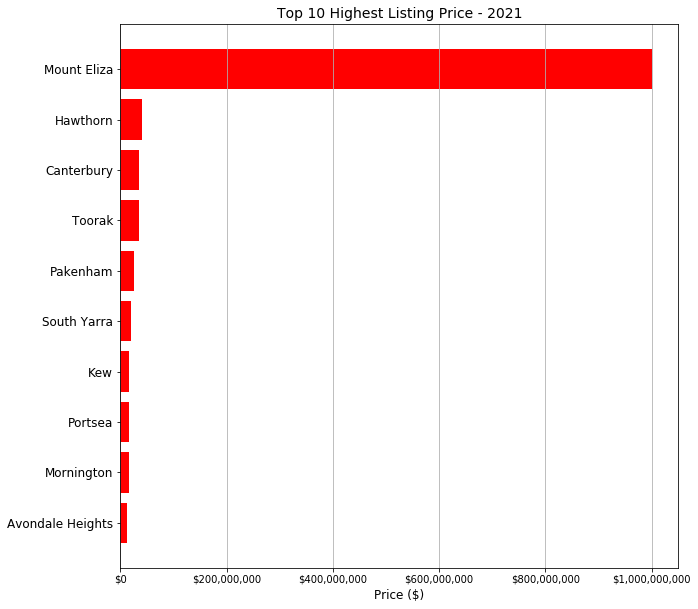

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2021["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Listing Price - 2021.png")
plt.show()

### The bottom 10 sell price suburb in 2019, 2020, 2021 (Median Sold Price&Lowest Sold Price)

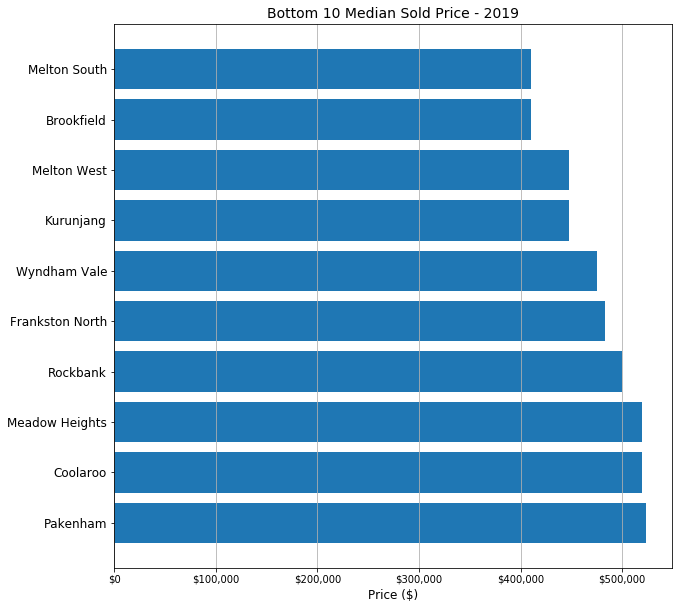

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_price_2019["medianSoldPrice"]
y_axis = bottom_10_median_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Median Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Median Sold Price - 2019.png")
plt.show()

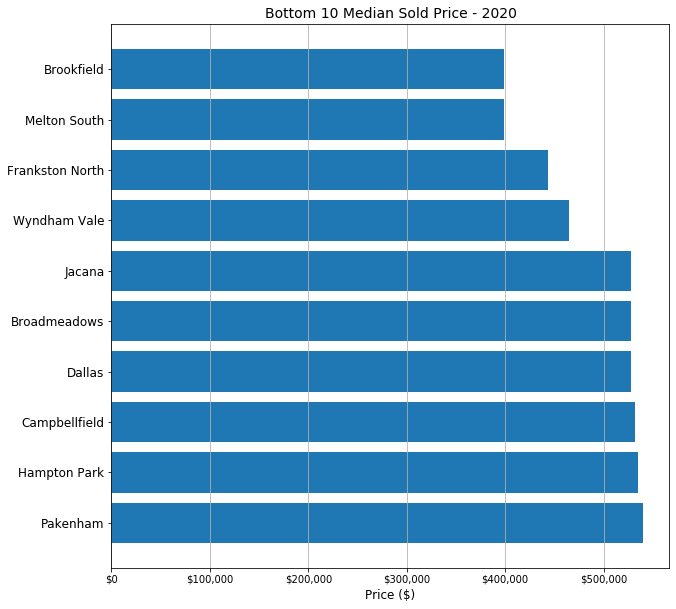

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_price_2020["medianSoldPrice"]
y_axis = bottom_10_median_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Median Sold Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Median Sold Price - 2020.png")
plt.show()

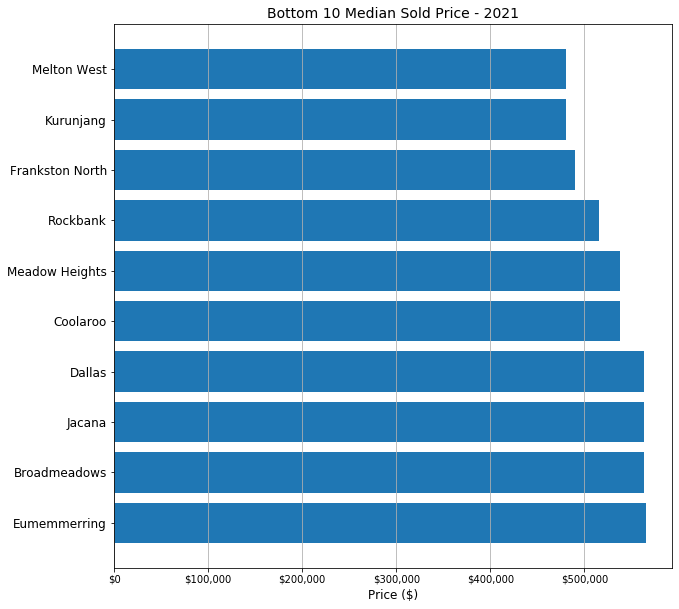

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_price_2021["medianSoldPrice"]
y_axis = bottom_10_median_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Median Sold Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Median Sold Price - 2021.png")
plt.show()

### The top 10 rent list price suburb in 2019, 2020, 2021 (Median Rent Listing Price&Highest Rent Listing Price)

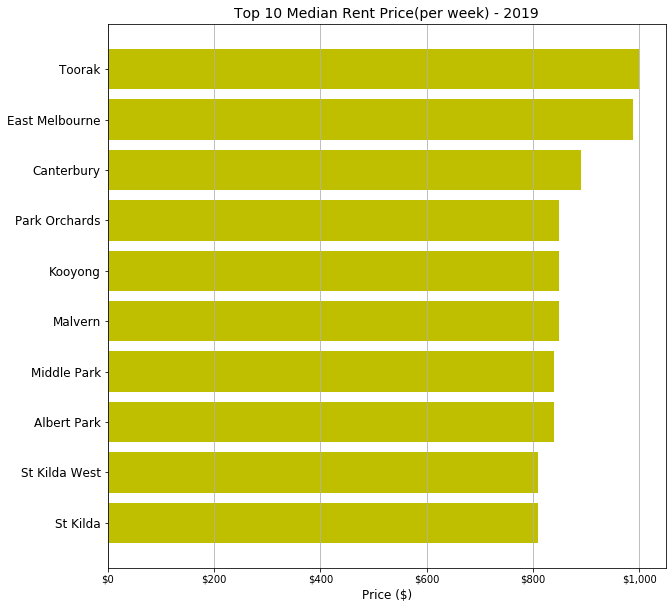

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_rent_price_2019["medianRentListingPrice"]
y_axis = top_10_median_rent_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'y')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Rent Price(per week) - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Rent Price(per week) - 2019.png")
plt.show()

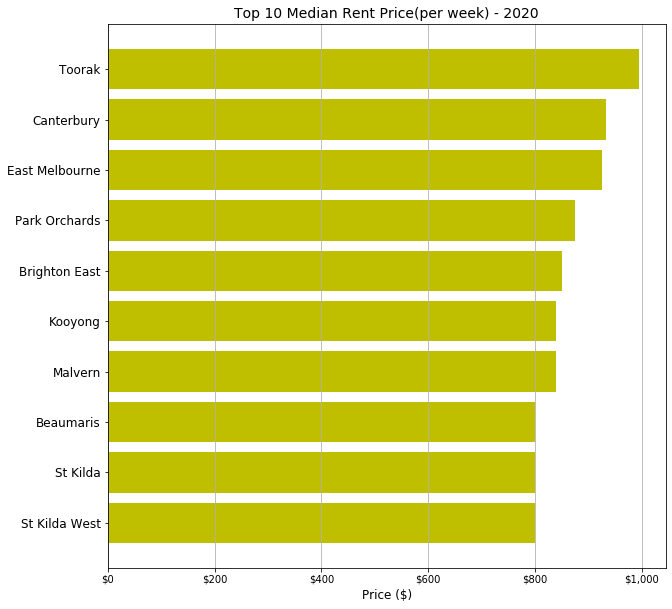

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_rent_price_2020["medianRentListingPrice"]
y_axis = top_10_median_rent_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'y')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Rent Price(per week) - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Rent Price(per week) - 2020.png")
plt.show()

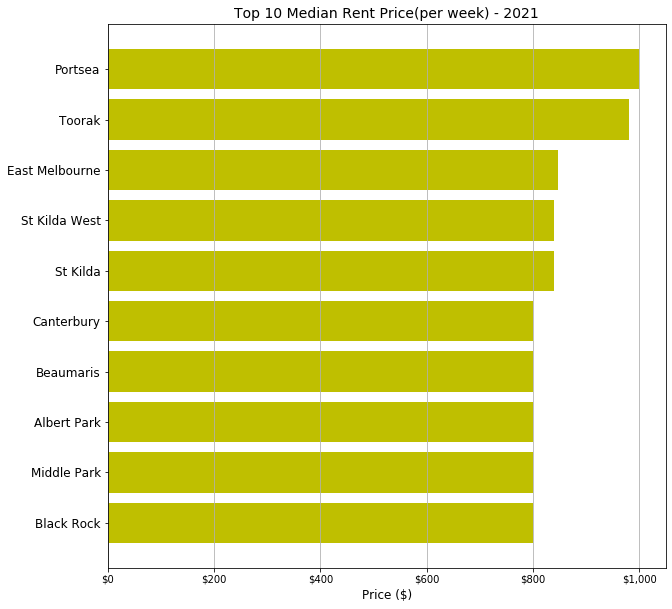

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_rent_price_2021["medianRentListingPrice"]
y_axis = top_10_median_rent_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'y')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Rent Price(per week) - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Median Rent Price(per week) - 2021.png")
plt.show()

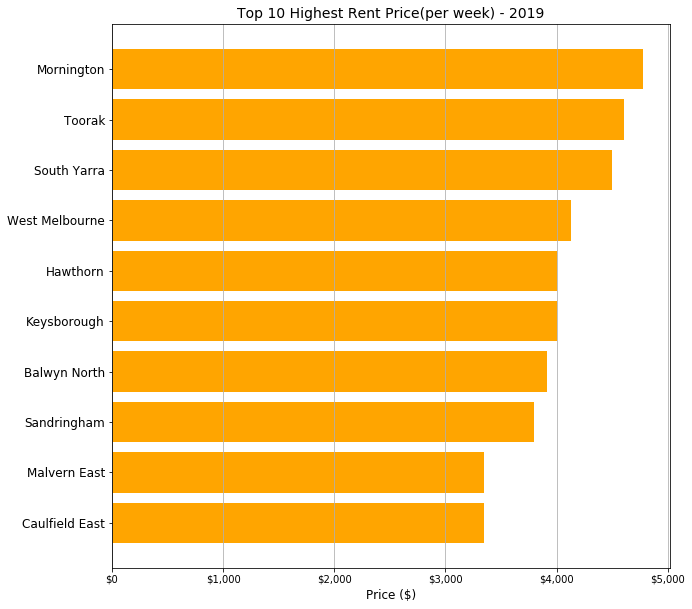

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_rent_price_2019["highestRentListingPrice"]
y_axis = top_10_highest_rent_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'orange')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Rent Price(per week) - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Rent Price(per week) - 2019.png")
plt.show()

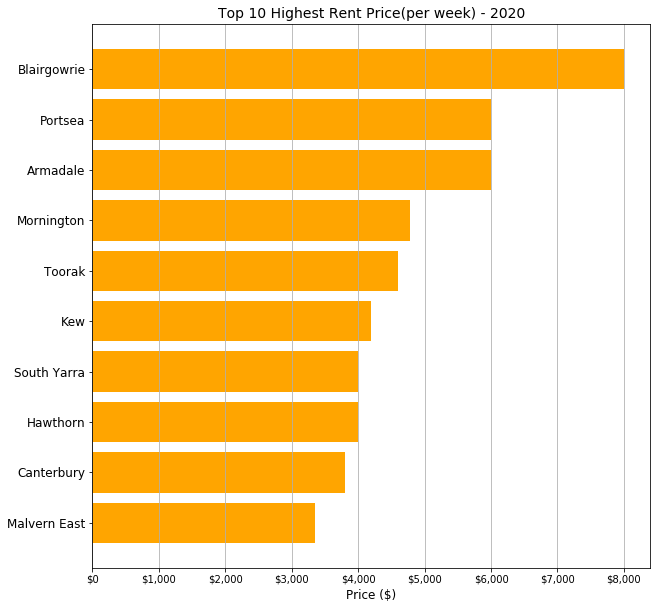

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_rent_price_2020["highestRentListingPrice"]
y_axis = top_10_highest_rent_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'orange')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Rent Price(per week) - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Rent Price(per week) - 2020.png")
plt.show()

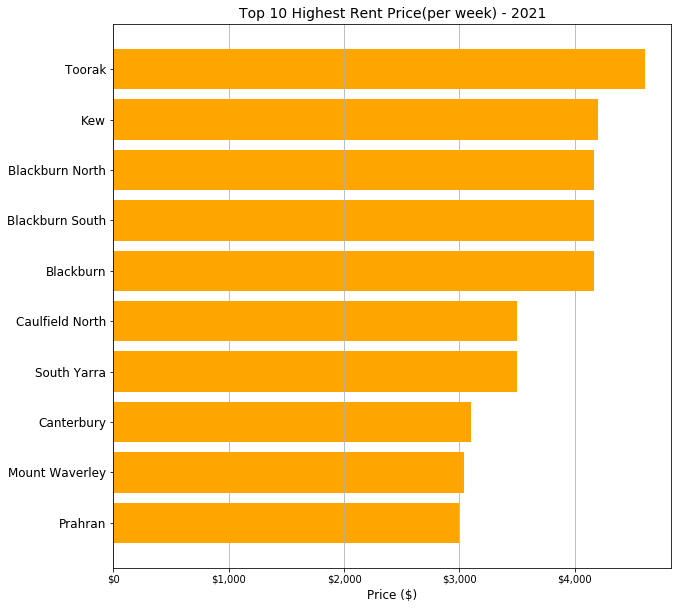

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_rent_price_2021["highestRentListingPrice"]
y_axis = top_10_highest_rent_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'orange')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Rent Price(per week) - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Highest Rent Price(per week) - 2021.png")
plt.show()

### The bottom 10 rent list price suburb in 2019, 2020, 2021 (Median Rent Listing Price& Lowest Rent Listing Price)

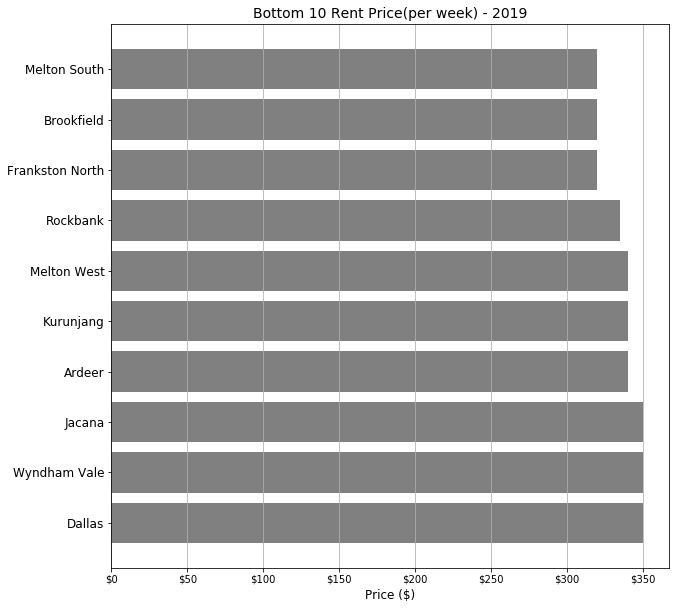

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_rent_price_2019["medianRentListingPrice"]
y_axis = bottom_10_median_rent_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'grey')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Rent Price(per week) - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Rent Price(per week) - 2019.png")
plt.show()

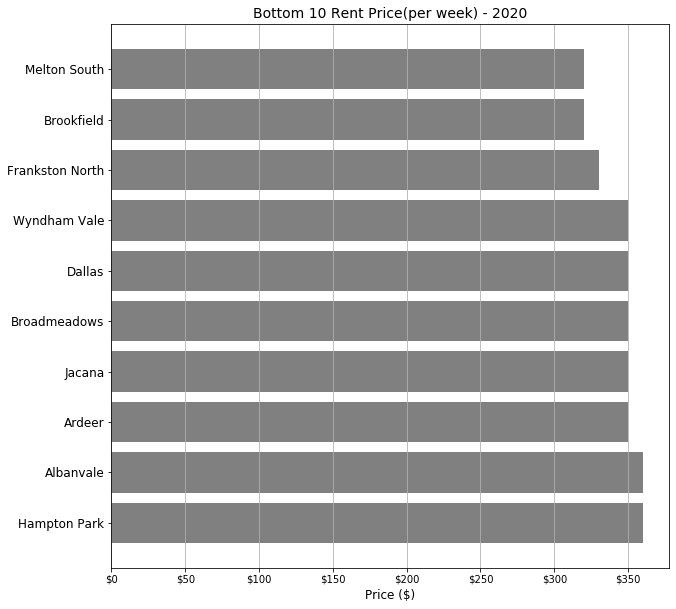

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_rent_price_2020["medianRentListingPrice"]
y_axis = bottom_10_median_rent_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'grey')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Rent Price(per week) - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Rent Price(per week) - 2020.png")
plt.show()

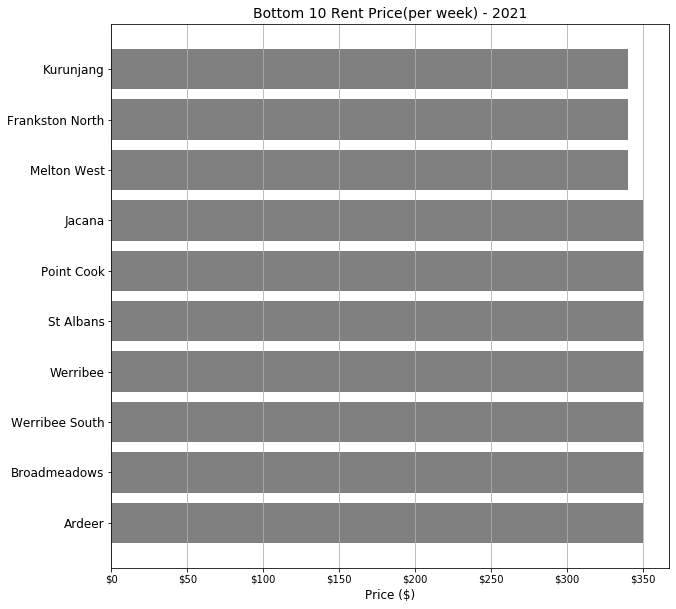

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_rent_price_2021["medianRentListingPrice"]
y_axis = bottom_10_median_rent_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'grey')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Rent Price(per week) - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Bottom 10 Rent Price(per week) - 2021.png")
plt.show()

## Top 10 largerest property price drop suburb(2019 vs 2020)

In [151]:
yearly_data_2019_raw = pd.read_csv("Resources/raw_data/yearly_data_2019.csv")
yearly_data_2020_raw = pd.read_csv("Resources/raw_data/yearly_data_2020.csv")
yearly_data_2021_raw = pd.read_csv("Resources/raw_data/yearly_data_2021.csv")

In [167]:
median_sold_price_difference1 = yearly_data_2020_raw["medianSoldPrice"] - yearly_data_2019_raw["medianSoldPrice"]
price_difference_pd1 = pd.DataFrame({"Postcode" : yearly_data_2020_raw["Postcode"],
                                    "Suburb" : yearly_data_2020_raw["Suburb"],
                                   "Sold Price difference" : median_sold_price_difference1})
price_difference_pd1 = price_difference_pd.dropna()
price_difference_pd1

,Postcode,Suburb,Sold Price difference
0,3067,Abbotsford,130000.0
1,3040,Aberfeldie,32000.0
2,3042,Airport West,97000.0
3,3021,Albanvale,-6000.0
4,3206,Albert Park,175000.0
...,...,...,...
383,3115,Wonga Park,-9000.0
384,3024,Wyndham Vale,-10000.0
385,3085,Yallambie,47000.0
386,3091,Yarrambat,10000.0


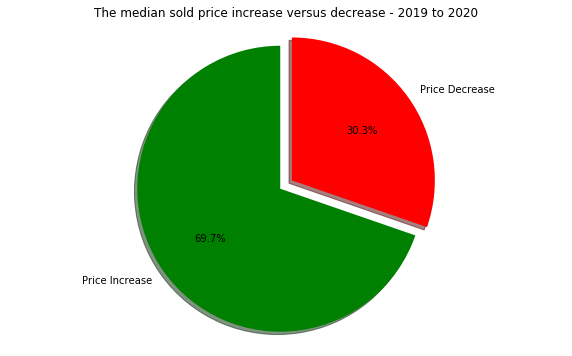

In [231]:
plt.figure(figsize=(10,6))
bins = (-1200000,0,1200000)
value_change = pd.cut(price_difference_pd1["Sold Price difference"], bins=bins).value_counts()
labels = 'Price Increase','Price Decrease'
explode = (0.1, 0)
colors = ['Green','Red']
plt.pie(value_change, explode = explode, labels=labels, autopct ='%1.1f%%', shadow=True, colors = colors, startangle=90)
plt.axis('equal')
plt.title("The median sold price increase versus decrease - 2019 to 2020")

plt.savefig("Savefig/The median sold price increase versus decrease - 2019 to 2020.png")
plt.show()

In [162]:
value_change

(0, 1200000]     237
(-1200000, 0]    103
Name: Sold Price difference, dtype: int64

In [169]:
positive_price_difference1 = price_difference_pd1.sort_values(by = "Sold Price difference" , ascending = False)
negative_price_difference1 = price_difference_pd1.sort_values(by = "Sold Price difference" , ascending = True)

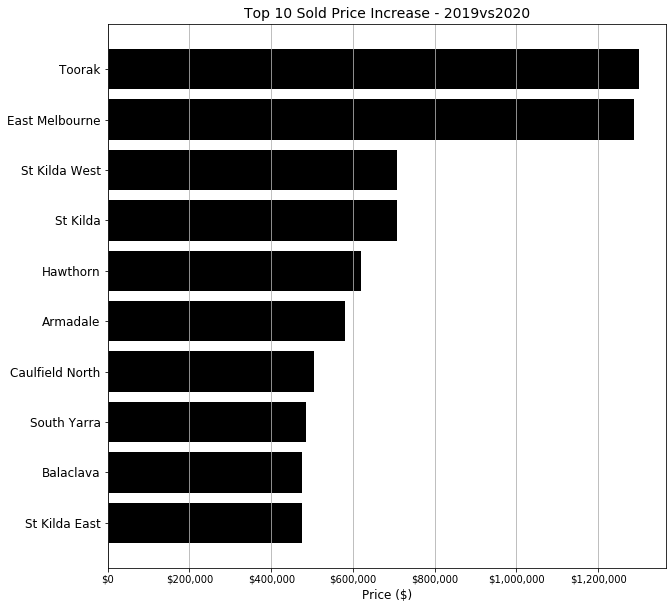

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = positive_price_difference1.head(10)["Sold Price difference"]
y_axis = positive_price_difference1.head(10)["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'Black')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Sold Price Increase - 2019vs2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Sold Price Increase - 2019vs2020.png")
plt.show()

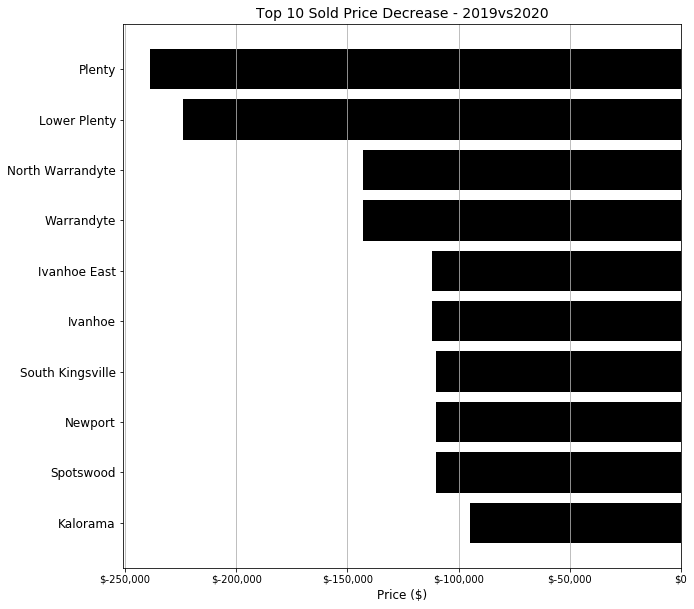

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = negative_price_difference1.head(10)["Sold Price difference"]
y_axis = negative_price_difference1.head(10)["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'Black')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Sold Price Decrease - 2019vs2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Sold Price Decrease - 2019vs2020.png")
plt.show()

## Top 10 largerest property price drop suburb(2020 vs 2021)

In [168]:
median_sold_price_difference2 = yearly_data_2021_raw["medianSoldPrice"] - yearly_data_2020_raw["medianSoldPrice"]
price_difference_pd2 = pd.DataFrame({"Postcode" : yearly_data_2020_raw["Postcode"],
                                    "Suburb" : yearly_data_2020_raw["Suburb"],
                                   "Sold Price difference" : median_sold_price_difference2})
price_difference_pd2 = price_difference_pd2.dropna()
price_difference_pd2

,Postcode,Suburb,Sold Price difference
0,3067,Abbotsford,100000.0
1,3040,Aberfeldie,-40000.0
2,3042,Airport West,0.0
3,3021,Albanvale,23000.0
4,3206,Albert Park,-70000.0
...,...,...,...
383,3115,Wonga Park,213000.0
384,3024,Wyndham Vale,40000.0
385,3085,Yallambie,5000.0
386,3091,Yarrambat,153000.0


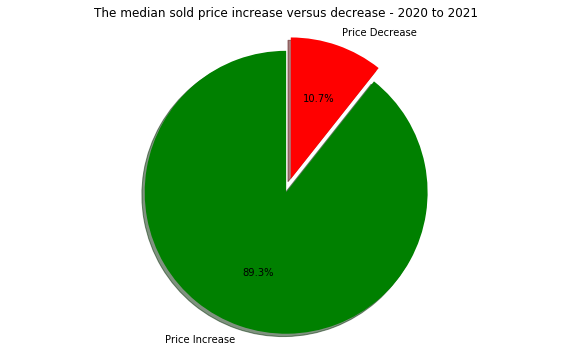

In [234]:
plt.figure(figsize=(10,6))
bins = (-800000,0,800000)
value_change = pd.cut(price_difference_pd2["Sold Price difference"], bins=bins).value_counts()
labels = 'Price Increase','Price Decrease'
explode = (0.1, 0)
colors = ['Green','Red']
plt.pie(value_change, explode = explode, labels=labels, autopct ='%1.1f%%', shadow=True, colors = colors, startangle=90)
plt.axis('equal')
plt.title("The median sold price increase versus decrease - 2020 to 2021")

plt.savefig("Savefig/The median sold price increase versus decrease - 2020 to 2021.png")
plt.show()

In [238]:
value_change 

(0, 800000]     310
(-800000, 0]     37
Name: Sold Price difference, dtype: int64

In [173]:
positive_price_difference2 = price_difference_pd2.sort_values(by = "Sold Price difference" , ascending = False)
negative_price_difference2 = price_difference_pd2.sort_values(by = "Sold Price difference" , ascending = True)

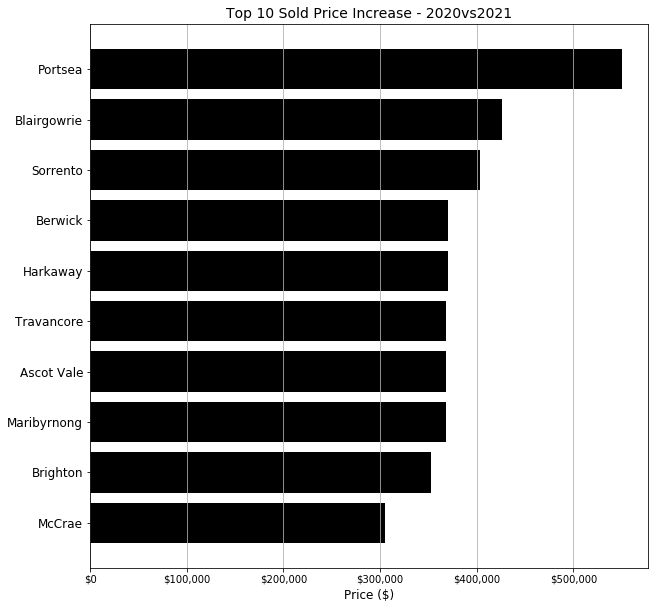

In [235]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = positive_price_difference2.head(10)["Sold Price difference"]
y_axis = positive_price_difference2.head(10)["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'Black')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Sold Price Increase - 2020vs2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Sold Price Increase - 2020vs2021.png")
plt.show()

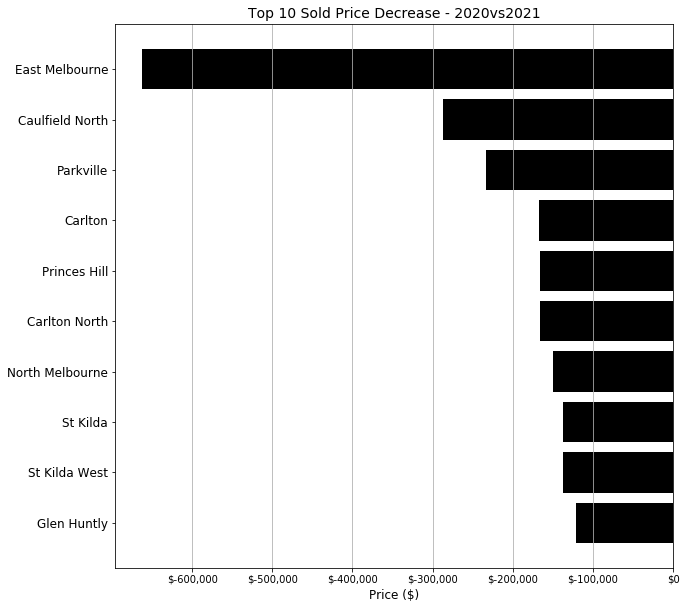

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = negative_price_difference2.head(10)["Sold Price difference"]
y_axis = negative_price_difference2.head(10)["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'Black')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Sold Price Decrease - 2020vs2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")

plt.savefig("Savefig/Top 10 Sold Price Decrease - 2020vs2021.png")
plt.show()